In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
from library.classifiers import *
from library.splitter_df import split
from sklearn.model_selection import train_test_split

In [2]:
df = sns.load_dataset("iris")

encoder = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
decoder = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

df['species'] = df['species'].map(encoder)

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X_train, X_test, y_train, y_test = split(df, 'species')

In [4]:
BC = Bayes_Classifier()
BC.fit(X_train, y_train, 'cccc', 'u')
BC_pred = BC.evaluate(X_test)
BC_accuracy = accuracy(BC_pred, y_test)

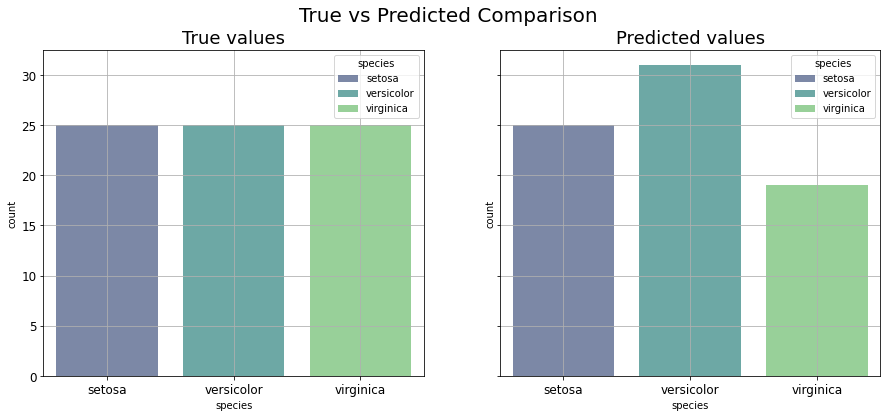

In [5]:
visualize(y_test, BC_pred, 'species', decoder)

In [6]:
NBC = NB_classifier()
NBC.fit(X_train, y_train, 'c', 'o')
NBC_pred = NBC.evaluate(X_test)
NBC_accuracy = accuracy(NBC_pred, y_test)

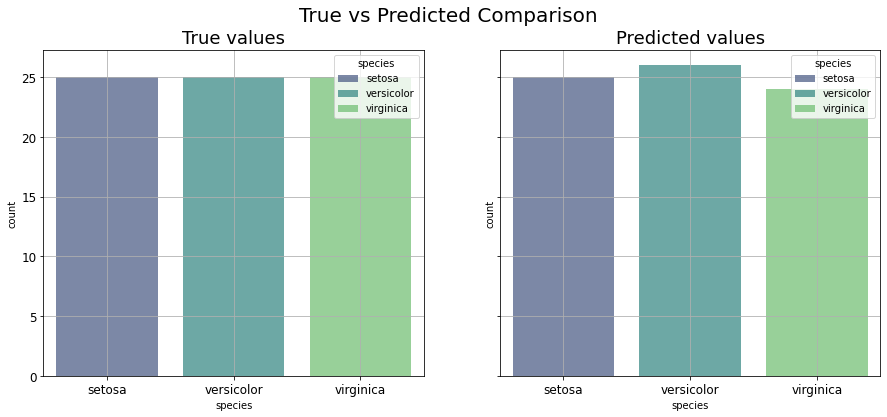

In [7]:
visualize(y_test, NBC_pred, 'species', decoder)

In [8]:
GNB = Gaussian_NB()
GNB.fit(X_train, y_train)
GNB_pred = GNB.predict(X_test)
GNB_accuracy = accuracy(GNB_pred, y_test)

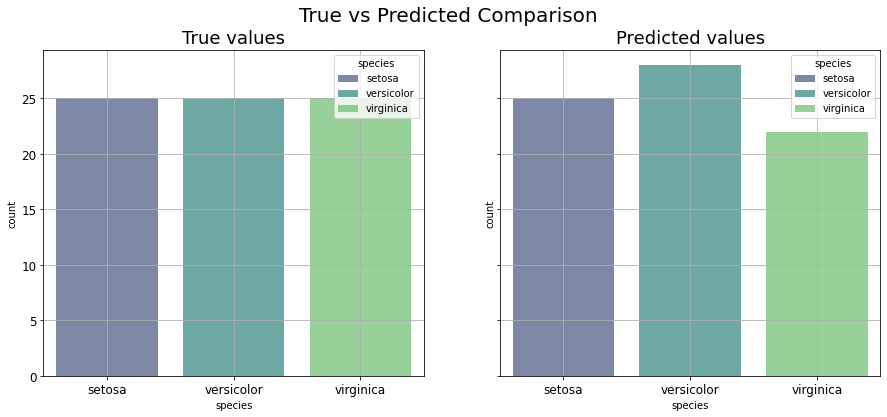

In [9]:
visualize(y_test, GNB_pred, 'species', decoder)

In [10]:
print(f'Bayes classifier accuracy is {BC_accuracy}')
print(f'Naive Bayes classifier accuracy is {NBC_accuracy}')
print(f'Gaussian Naive Bayes classifier accuracy is {GNB_accuracy:.2f}')

Bayes classifier accuracy is 0.92
Naive Bayes classifier accuracy is 0.96
Gaussian Naive Bayes classifier accuracy is 0.93


In [11]:
X = df[df.columns[:-1]].to_numpy()
y = df[df.columns[-1]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [39]:
def sim(n_sim):
    results = np.zeros((n_sim, 3))
    
    for i in range(n_sim):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
        BC = Bayes_Classifier()
        BC.fit(X_train, y_train, 'cccc', 'u')
        BC_pred = BC.evaluate(X_test)
        results[i, 0] = accuracy(BC_pred, y_test)

        NBC = NB_classifier()
        NBC.fit(X_train, y_train, 'c', 'o')
        NBC_pred = NBC.evaluate(X_test)
        results[i, 1] = accuracy(NBC_pred, y_test)

        GNB = Gaussian_NB()
        GNB.fit(X_train, y_train)
        GNB_pred = GNB.predict(X_test)
        results[i, 2] = accuracy(GNB_pred, y_test)
    return results

In [42]:
res = sim(100)

In [48]:
mean = np.around(res.mean(axis=0), 2)
upper = np.around(res.mean(axis=0) + 1.96 * res.std(axis=0), 2)
lower = np.around(res.mean(axis=0) - 1.96 * res.std(axis=0), 2)
upper[upper > 1] = 1.00

In [49]:
models = ['Bayes', 'Naive Bayes', 'Gaussian N.B.']
for mo, m, l, u in zip(models, mean, lower, upper):
    print(f'{mo}\t{m}[{l}-{u}]')

Bayes	0.87[0.71-1.0]
Naive Bayes	0.91[0.83-0.99]
Gaussian N.B.	0.95[0.91-0.99]
